In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [131]:
# Load training set
X_train = pd.read_csv("./features/X_train.csv")
X_train_processed = X_train[X_train.columns[2:]].to_numpy()
X_test = pd.read_csv("./features/X_test.csv")
X_test_processed = X_test[X_test.columns[2:]].to_numpy()

y_train = pd.read_csv("./features/y_train.csv", usecols=[1]).transpose().to_numpy()[0]
y_test = pd.read_csv("./features/y_test.csv", usecols=[1]).transpose().to_numpy()[0]

In [132]:
gboost = make_pipeline(StandardScaler(), HistGradientBoostingClassifier(loss='log_loss', learning_rate=0.1, random_state=42))
model = OneVsOneClassifier(gboost)

model.fit(X_train_processed, y_train)

# pickle model - saves it so you can load it later
with open('model.obj', 'wb') as f:
        pickle.dump(model, f)

In [133]:
# pickle model - saves it so you can load it later
with open('model.obj', 'wb') as f:
        pickle.dump(model, f)

Accuracy on testing set =  0.6080367784777797


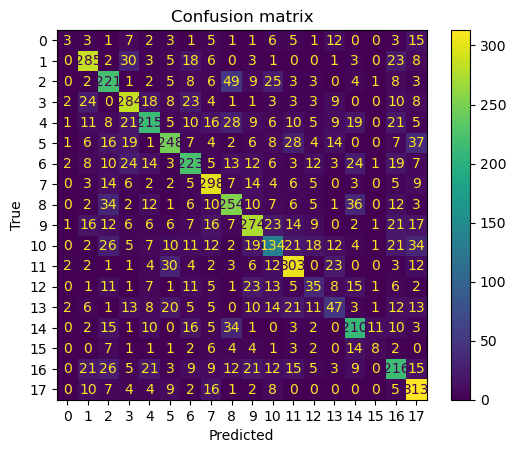

In [134]:
def cm(y_test, y_test_predictions):
    print("Accuracy on testing set = ", accuracy_score(y_test, y_test_predictions))
    #print("F1 score on testing set = ", f1_score(y_test, y_test_predictions, average="micro"))

    # Plot a confusion matrix
    cm = confusion_matrix(y_test, y_test_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
# Evaluate your model on the testing set
y_test_predictions = model.predict(X_test_processed)
cm(y_test, y_test_predictions)

### KNN model

Accuracy on testing set =  0.5666609909756513


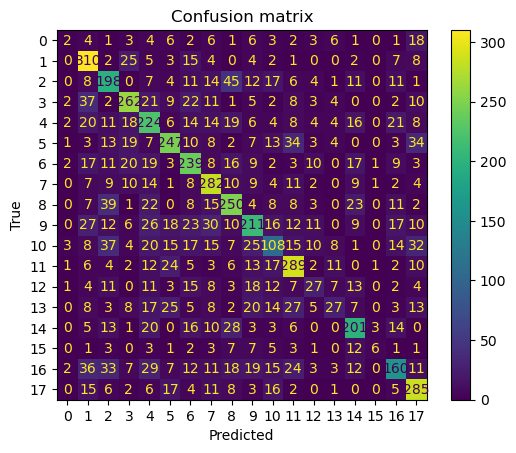

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=8))
model2.fit(X_train_processed, y_train)
y_test_predictions = model2.predict(X_test_processed)
cm(y_test, y_test_predictions)

### Random Forest

Accuracy on testing set =  0.596798910267325


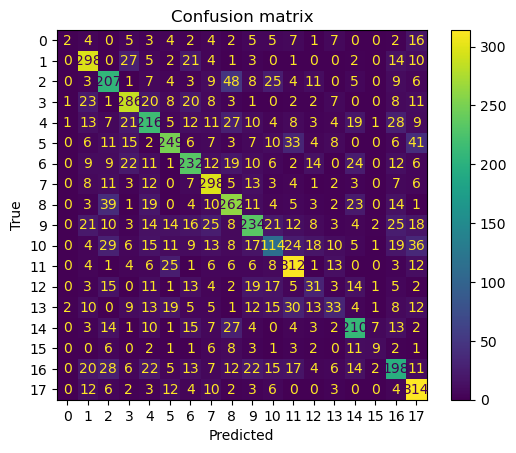

In [136]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train_processed, y_train)
y_test_predictions = model2.predict(X_test_processed)
cm(y_test, y_test_predictions)

### Decision Tree

Accuracy on testing set =  0.4323173846415801


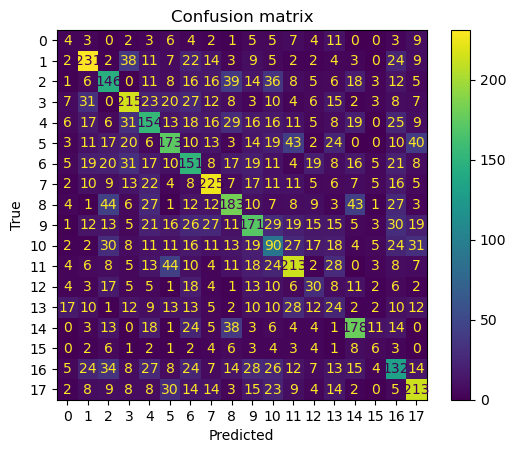

In [137]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train_processed, y_train)
y_test_predictions = model2.predict(X_test_processed)
cm(y_test, y_test_predictions)

### Neural Network

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on testing set =  0.5559339349565809


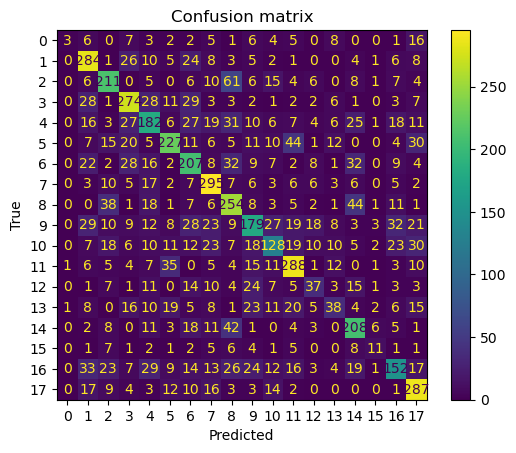

In [138]:
from sklearn.neural_network import MLPClassifier
model2 = MLPClassifier(max_iter=600)
model2.fit(X_train_processed, y_train)
y_test_predictions = model2.predict(X_test_processed)
cm(y_test, y_test_predictions)